In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer # Imputation
from sklearn.preprocessing import QuantileTransformer # Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve


# Deep Learning 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/tabular-playground-series-aug-2022'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/tabular-playground-series-aug-2022/sample_submission.csv
../input/tabular-playground-series-aug-2022/train.csv
../input/tabular-playground-series-aug-2022/test.csv


## Import Data

In [2]:
df_test = pd.read_csv("../input/tabular-playground-series-aug-2022/test.csv")
df_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [3]:
df_train = pd.read_csv("../input/tabular-playground-series-aug-2022/train.csv")
df_train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [4]:
df_train.shape, df_test.shape

((26570, 26), (20775, 25))

In [5]:
df_train.set_index("id")

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


### Data Type

In [6]:
df_train.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [7]:
df_test.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
dtype: object

### Basic stats of data

In [8]:
df_train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [9]:
df_test.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20775.000000,20552.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20446.000000,20366.000000,20267.000000,...,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
mean,36957.000000,127.634895,7.733959,6.196823,7.453574,8.962407,6.126931,17.793466,11.727331,17.138080,...,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,5997.370257,39.154642,1.308535,1.917478,4.274477,4.334200,3.835881,1.002206,1.006834,1.008714,...,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,26570.000000,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,...,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,31763.500000,99.470000,6.000000,4.000000,4.000000,6.000000,3.000000,17.119000,11.048250,16.457000,...,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,36957.000000,122.110000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.729000,17.132000,...,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,42150.500000,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.478000,12.411000,17.824500,...,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500
max,47344.000000,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,...,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


In [10]:
df_train.describe(include="all")

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26570,26320.000000,26570,26570,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
unique,NaN,5,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C,NaN,material_7,material_8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5765,NaN,21320,10865,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13284.500000,NaN,127.826233,NaN,NaN,6.754046,7.240459,7.415883,8.232518,6.256568,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,NaN,39.030020,NaN,NaN,1.471852,1.456493,4.116690,4.199401,3.309109,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,NaN,33.160000,NaN,NaN,5.000000,5.000000,0.000000,0.000000,0.000000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,NaN,99.987500,NaN,NaN,6.000000,6.000000,4.000000,5.000000,4.000000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,NaN,122.390000,NaN,NaN,6.000000,8.000000,7.000000,8.000000,6.000000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,NaN,149.152500,NaN,NaN,8.000000,8.000000,10.000000,11.000000,8.000000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000


In [11]:
df_test.describe(include="all")

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20775.000000,20775,20552.000000,20775,20775,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,...,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
unique,NaN,4,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,material_5,material_6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5422,NaN,10529,10529,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36957.000000,NaN,127.634895,NaN,NaN,7.733959,6.196823,7.453574,8.962407,6.126931,...,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,5997.370257,NaN,39.154642,NaN,NaN,1.308535,1.917478,4.274477,4.334200,3.835881,...,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,26570.000000,NaN,37.700000,NaN,NaN,6.000000,4.000000,0.000000,0.000000,0.000000,...,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,31763.500000,NaN,99.470000,NaN,NaN,6.000000,4.000000,4.000000,6.000000,3.000000,...,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,36957.000000,NaN,122.110000,NaN,NaN,7.000000,5.000000,7.000000,9.000000,6.000000,...,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,42150.500000,NaN,148.840000,NaN,NaN,9.000000,7.000000,10.000000,12.000000,8.000000,...,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

## Data Preparation
* Checking of missing values
* Imputation: Sampling from Simulated Data Distribution
* Labelling Data
* Features Engineering

In [13]:
# Missing values in Train data
percent_miss_train = df_train.isnull().sum()/len(df_train) * 100
num_miss_train = df_train.isnull().sum()
df_miss = pd.DataFrame({"sum_missing_value":num_miss_train,
                        "Percent_missing_value(%)":percent_miss_train})
df_miss

,sum_missing_value,Percent_missing_value(%)
id,0,0.000000
product_code,0,0.000000
loading,250,0.940911
attribute_0,0,0.000000
attribute_1,0,0.000000
attribute_2,0,0.000000
attribute_3,0,0.000000
measurement_0,0,0.000000
measurement_1,0,0.000000
measurement_2,0,0.000000


In [14]:
# Missing values in Test data
percent_miss_test = df_test.isnull().sum()/len(df_test) * 100
num_miss_test = df_test.isnull().sum()
df_miss_test = pd.DataFrame({"sum_missing_value":num_miss_test,
                        "Percent_missing_value(%)":percent_miss_test})
df_miss_test

,sum_missing_value,Percent_missing_value(%)
id,0,0.000000
product_code,0,0.000000
loading,223,1.073406
attribute_0,0,0.000000
attribute_1,0,0.000000
attribute_2,0,0.000000
attribute_3,0,0.000000
measurement_0,0,0.000000
measurement_1,0,0.000000
measurement_2,0,0.000000


### Numerical features

In [15]:
# drop "failure" column
df_train_feature = df_train.drop(["failure"], axis=1)
df_train_feature.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [16]:
# Join train and test data
df_join = pd.concat([df_train_feature, df_test], axis=0)
df_join.shape

(47345, 25)

In [17]:
df_join.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
dtype: object

In [18]:
# Missing values in all data
percent_miss_all = df_join.isnull().sum()/len(df_test) * 100
num_miss_all = df_join.isnull().sum()
df_miss_all = pd.DataFrame({"sum_missing_value":num_miss_all,
                        "Percent_missing_value(%)":percent_miss_all})
df_miss_all

,sum_missing_value,Percent_missing_value(%)
id,0,0.000000
product_code,0,0.000000
loading,473,2.276775
attribute_0,0,0.000000
attribute_1,0,0.000000
attribute_2,0,0.000000
attribute_3,0,0.000000
measurement_0,0,0.000000
measurement_1,0,0.000000
measurement_2,0,0.000000


In [19]:
df_join = df_join.set_index("id")
df_join.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


In [20]:
df_join = df_join.drop(["product_code"],axis=1)
df_join.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,...,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,...,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,...,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,...,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,...,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


In [21]:
df_join1 = df_join.copy()

In [22]:
# Numeric feature
feature = [col for col in df_join.columns if col == "loading" or col.startswith("measurement_")]
feature

['loading',
 'measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

### Visualize on numeric data

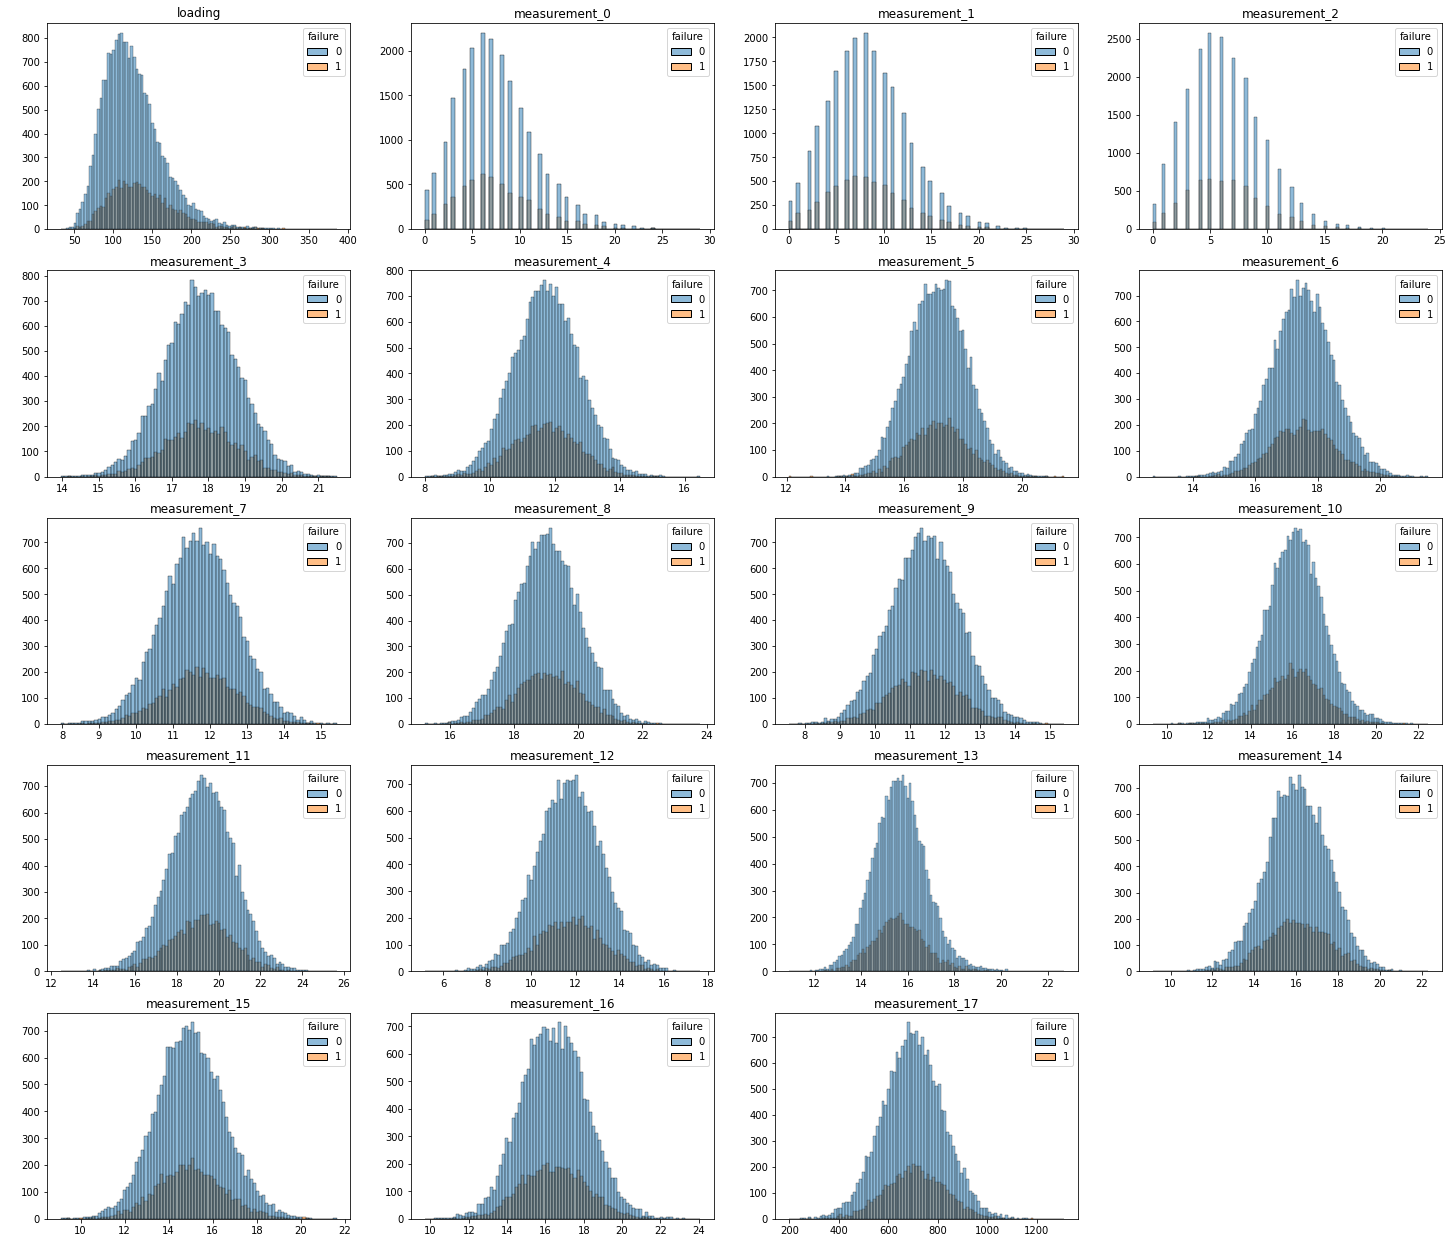

In [23]:
plt.figure(figsize= (25,22))
feature = [col for col in df_join.columns if col == "loading" or col.startswith("measurement_")]
for i, col in enumerate(feature):
    plt.subplot(5,4,i+1)
    sns.histplot(data=df_train,
                x=df_train[col],
                hue=df_train["failure"],
                )
    plt.title(col)
    plt.xlabel(" ")
    plt.ylabel(" ")

<AxesSubplot:xlabel='loading', ylabel='Count'>

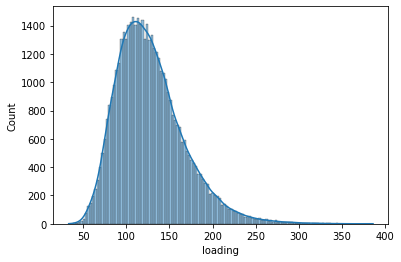

In [24]:
# Look closer to loading feature
sns.histplot(data=df_join1,
             x=df_join1["loading"],
             kde=True)

<AxesSubplot:xlabel='loading', ylabel='Count'>

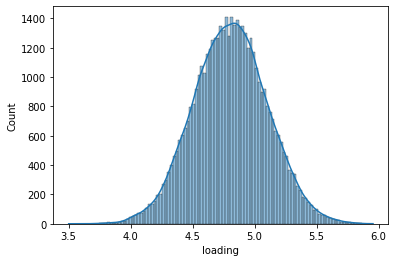

In [25]:
# Log-transformation 
df_join1["loading"] = np.log(df_join1["loading"])
sns.histplot(data=df_join1,
             x=df_join1["loading"],
             kde=True)

### Scaling data and KNN imputation 

In [26]:
# Scaling data
scaler = QuantileTransformer()

df_join1[feature] = scaler.fit_transform(df_join1[feature])
df_join1.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
0,0.077729,material_7,material_8,9,5,0.494995,0.481481,0.288288,0.598599,0.784117,...,0.867868,0.225475,0.425759,0.181932,0.990553,0.290726,NaN,0.090646,0.137246,0.696380
1,0.111487,material_7,material_8,9,5,0.927928,0.086587,0.187688,0.662996,0.424758,...,0.129530,0.847181,0.896786,0.241410,0.480981,0.211545,0.319820,0.339840,0.301417,0.437050
2,0.094017,material_7,material_8,9,5,0.861862,0.020521,0.401902,0.604605,0.468125,...,0.231570,0.903103,0.358108,NaN,0.923023,0.807808,0.961286,0.269438,0.797083,0.376298
3,0.264031,material_7,material_8,9,5,0.899399,0.047047,0.516517,0.309974,0.294294,...,0.512513,0.852352,0.563564,0.340340,0.106730,0.359433,0.355105,0.769520,0.637387,0.843211
4,0.924921,material_7,material_8,9,5,0.677177,0.047047,0.723223,0.939219,0.887888,...,0.176426,0.139540,0.750034,0.711712,0.671282,0.669281,0.013826,0.104533,0.469219,0.162469


In [27]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_join1[feature] = knn_imputer.fit_transform(df_join1[feature])
df_join1.isnull().sum()

loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

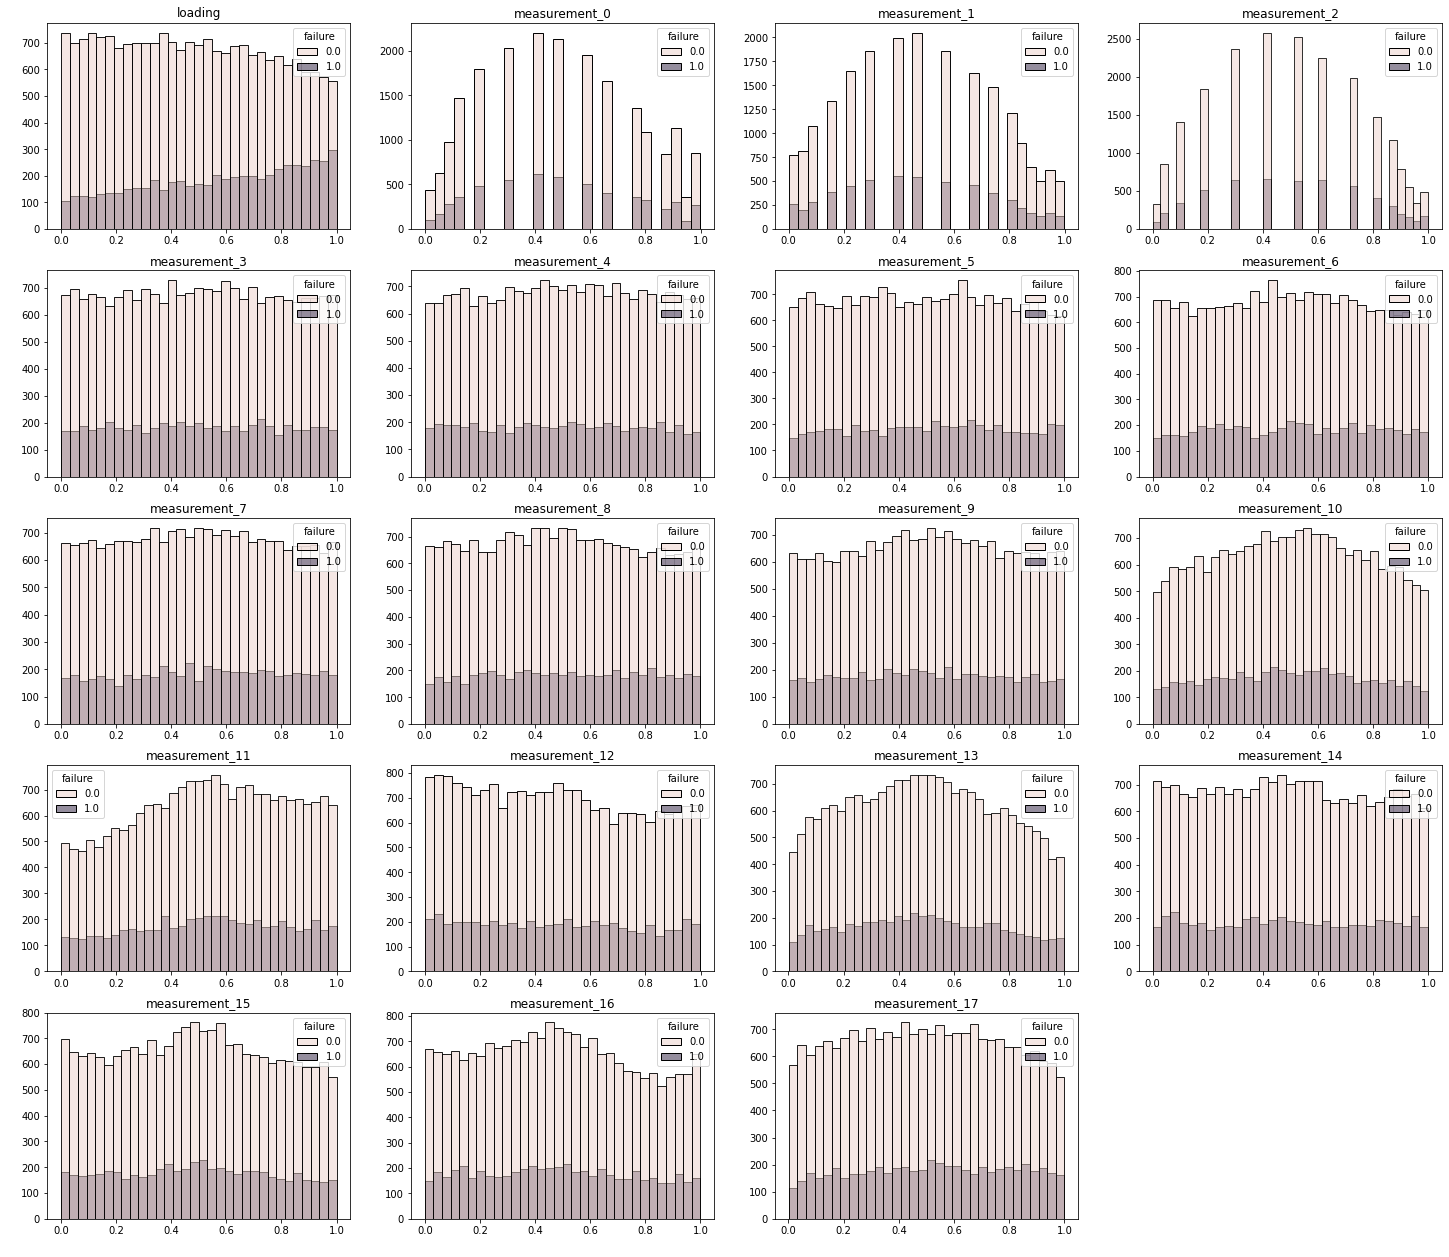

In [28]:
plt.figure(figsize= (25,22))
feature = [col for col in df_join.columns if col == "loading" or col.startswith("measurement_")]
for i, col in enumerate(feature):
    plt.subplot(5,4,i+1)
    sns.histplot(data=df_join1,
                x=df_join1[col],
                hue=df_train["failure"],
                )
    plt.title(col)
    plt.xlabel(" ")
    plt.ylabel(" ")

### Categorical features
* attribute_0 - attribute_3 columns

In [29]:
# Column atribute_0
print("Data in attribute_0 of train data: ",df_train["attribute_0"].unique())
print("Data in attribute_0 of test data: ",df_test["attribute_0"].unique())

Data in attribute_0 of train data:  ['material_7' 'material_5']
Data in attribute_0 of test data:  ['material_5' 'material_7']


In [30]:
df_train_att0 = df_train["attribute_0"].value_counts()
df_train_att0

material_7    21320
material_5     5250
Name: attribute_0, dtype: int64

In [31]:
df_test_att0 = df_test["attribute_0"].value_counts()
df_test_att0

material_5    10529
material_7    10246
Name: attribute_0, dtype: int64

In [32]:
pd.concat([df_train_att0, df_test_att0], keys=["train", "test"],axis=0)

train  material_7    21320
       material_5     5250
test   material_5    10529
       material_7    10246
Name: attribute_0, dtype: int64

In [33]:
# Column atribute_1
print("Data in attribute_1 of train data: ",df_train["attribute_1"].unique())
print("Data in attribute_1 of test data: ",df_test["attribute_1"].unique())

Data in attribute_1 of train data:  ['material_8' 'material_5' 'material_6']
Data in attribute_1 of test data:  ['material_6' 'material_7' 'material_5']


In [34]:
df_train_att1 = df_train["attribute_1"].value_counts()
df_test_att1 = df_test["attribute_1"].value_counts()
pd.concat([df_train_att1, df_test_att1], keys=["train", "test"], axis=0)

train  material_8    10865
       material_5    10362
       material_6     5343
test   material_6    10529
       material_5     5228
       material_7     5018
Name: attribute_1, dtype: int64

In [35]:
# Column atribute_2
print("Data in attribute_2 of train data: ",df_train["attribute_2"].unique())
print("Data in attribute_2 of test data: ",df_test["attribute_2"].unique())

Data in attribute_2 of train data:  [9 8 5 6]
Data in attribute_2 of test data:  [6 9 7]


In [36]:
df_train_att2 = df_train["attribute_2"].value_counts()
df_test_att2 = df_test["attribute_2"].value_counts()
pd.concat([df_train_att2, df_test_att2], keys=["train", "test"], axis=0)

train  6    10455
       5     5765
       8     5250
       9     5100
test   9    10335
       6     5422
       7     5018
Name: attribute_2, dtype: int64

In [37]:
# Column atribute_3
print("Data in attribute_3 of train data: ",df_train["attribute_3"].unique())
print("Data in attribute_3 of test data: ",df_test["attribute_3"].unique())

Data in attribute_3 of train data:  [5 8 6 9]
Data in attribute_3 of test data:  [4 7 9 5]


In [38]:
df_train_att3 = df_train["attribute_3"].value_counts()
df_test_att3 = df_test["attribute_3"].value_counts()
pd.concat([df_train_att3, df_test_att3], keys=["train", "test"], axis=0)

train  8    11015
       9     5343
       6     5112
       5     5100
test   4     5422
       5     5228
       7     5107
       9     5018
Name: attribute_3, dtype: int64

In [39]:
df_train.groupby(["attribute_2","failure"])["attribute_2"].count()

attribute_2  failure
5            0          4545
             1          1220
6            0          8237
             1          2218
8            0          4198
             1          1052
9            0          3941
             1          1159
Name: attribute_2, dtype: int64

In [40]:
# Label incoding on attribute_0 and attribute_1
dummy_var = pd.get_dummies(df_join1[["attribute_0", "attribute_1"]])
dummy_var

,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8
id,,,,,,
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
47340,0,1,1,0,0,0
47341,0,1,1,0,0,0
47342,0,1,1,0,0,0


In [41]:
df_join1 = pd.concat([df_join1, dummy_var], axis=1)
df_join1.drop(["attribute_0", "attribute_1"], axis=1, inplace=True)

In [42]:
# Label incoding on attribute_2 and attribute_3
le = preprocessing.LabelEncoder()
le_fit = le.fit(df_join1["attribute_2"])
df_join1["attribute_2"] = le_fit.transform(df_join1["attribute_2"])
df_join1["attribute_2"].unique()

array([4, 3, 0, 1, 2])

In [43]:
le_fit2 = le.fit(df_join["attribute_3"])
df_join1["attribute_3"] = le_fit.transform(df_join1["attribute_3"])
df_join1["attribute_3"].unique()

array([1, 4, 2, 5, 0, 3])

In [44]:
df_join1.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_14,measurement_15,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8
id,,,,,,,,,,,,,,,,,,,,,
0,0.077729,4,1,0.494995,0.481481,0.288288,0.598599,0.784117,0.083576,0.961962,...,0.478374,0.090646,0.137246,0.696380,0,1,0,0,0,1
1,0.111487,4,1,0.927928,0.086587,0.187688,0.662996,0.424758,0.718719,0.646146,...,0.319820,0.339840,0.301417,0.437050,0,1,0,0,0,1
2,0.094017,4,1,0.861862,0.020521,0.401902,0.604605,0.468125,0.348682,0.767434,...,0.961286,0.269438,0.797083,0.376298,0,1,0,0,0,1
3,0.264031,4,1,0.899399,0.047047,0.516517,0.309974,0.294294,0.925354,0.797464,...,0.355105,0.769520,0.637387,0.843211,0,1,0,0,0,1
4,0.924921,4,1,0.677177,0.047047,0.723223,0.939219,0.887888,0.445445,0.038789,...,0.013826,0.104533,0.469219,0.162469,0,1,0,0,0,1


<p>from https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense</p>
<p>discovered that the missing of measurement_3 and measurement_5</p>
<p>affected to the failure rate </p>
<p>Therefore, we have to create additional columns namely, </p>
<p>"m_3_missing" and "m_5_missing"</p>

In [45]:
df_join1['m_3_missing']=df_join1.measurement_3.isna().astype(int)
df_join1['m_5_missing']=df_join1.measurement_5.isna().astype(int)
df_join1.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing
id,,,,,,,,,,,,,,,,,,,,,
0,0.077729,4,1,0.494995,0.481481,0.288288,0.598599,0.784117,0.083576,0.961962,...,0.137246,0.696380,0,1,0,0,0,1,0,0
1,0.111487,4,1,0.927928,0.086587,0.187688,0.662996,0.424758,0.718719,0.646146,...,0.301417,0.437050,0,1,0,0,0,1,0,0
2,0.094017,4,1,0.861862,0.020521,0.401902,0.604605,0.468125,0.348682,0.767434,...,0.797083,0.376298,0,1,0,0,0,1,0,0
3,0.264031,4,1,0.899399,0.047047,0.516517,0.309974,0.294294,0.925354,0.797464,...,0.637387,0.843211,0,1,0,0,0,1,0,0
4,0.924921,4,1,0.677177,0.047047,0.723223,0.939219,0.887888,0.445445,0.038789,...,0.469219,0.162469,0,1,0,0,0,1,0,0


### Checking of outlier

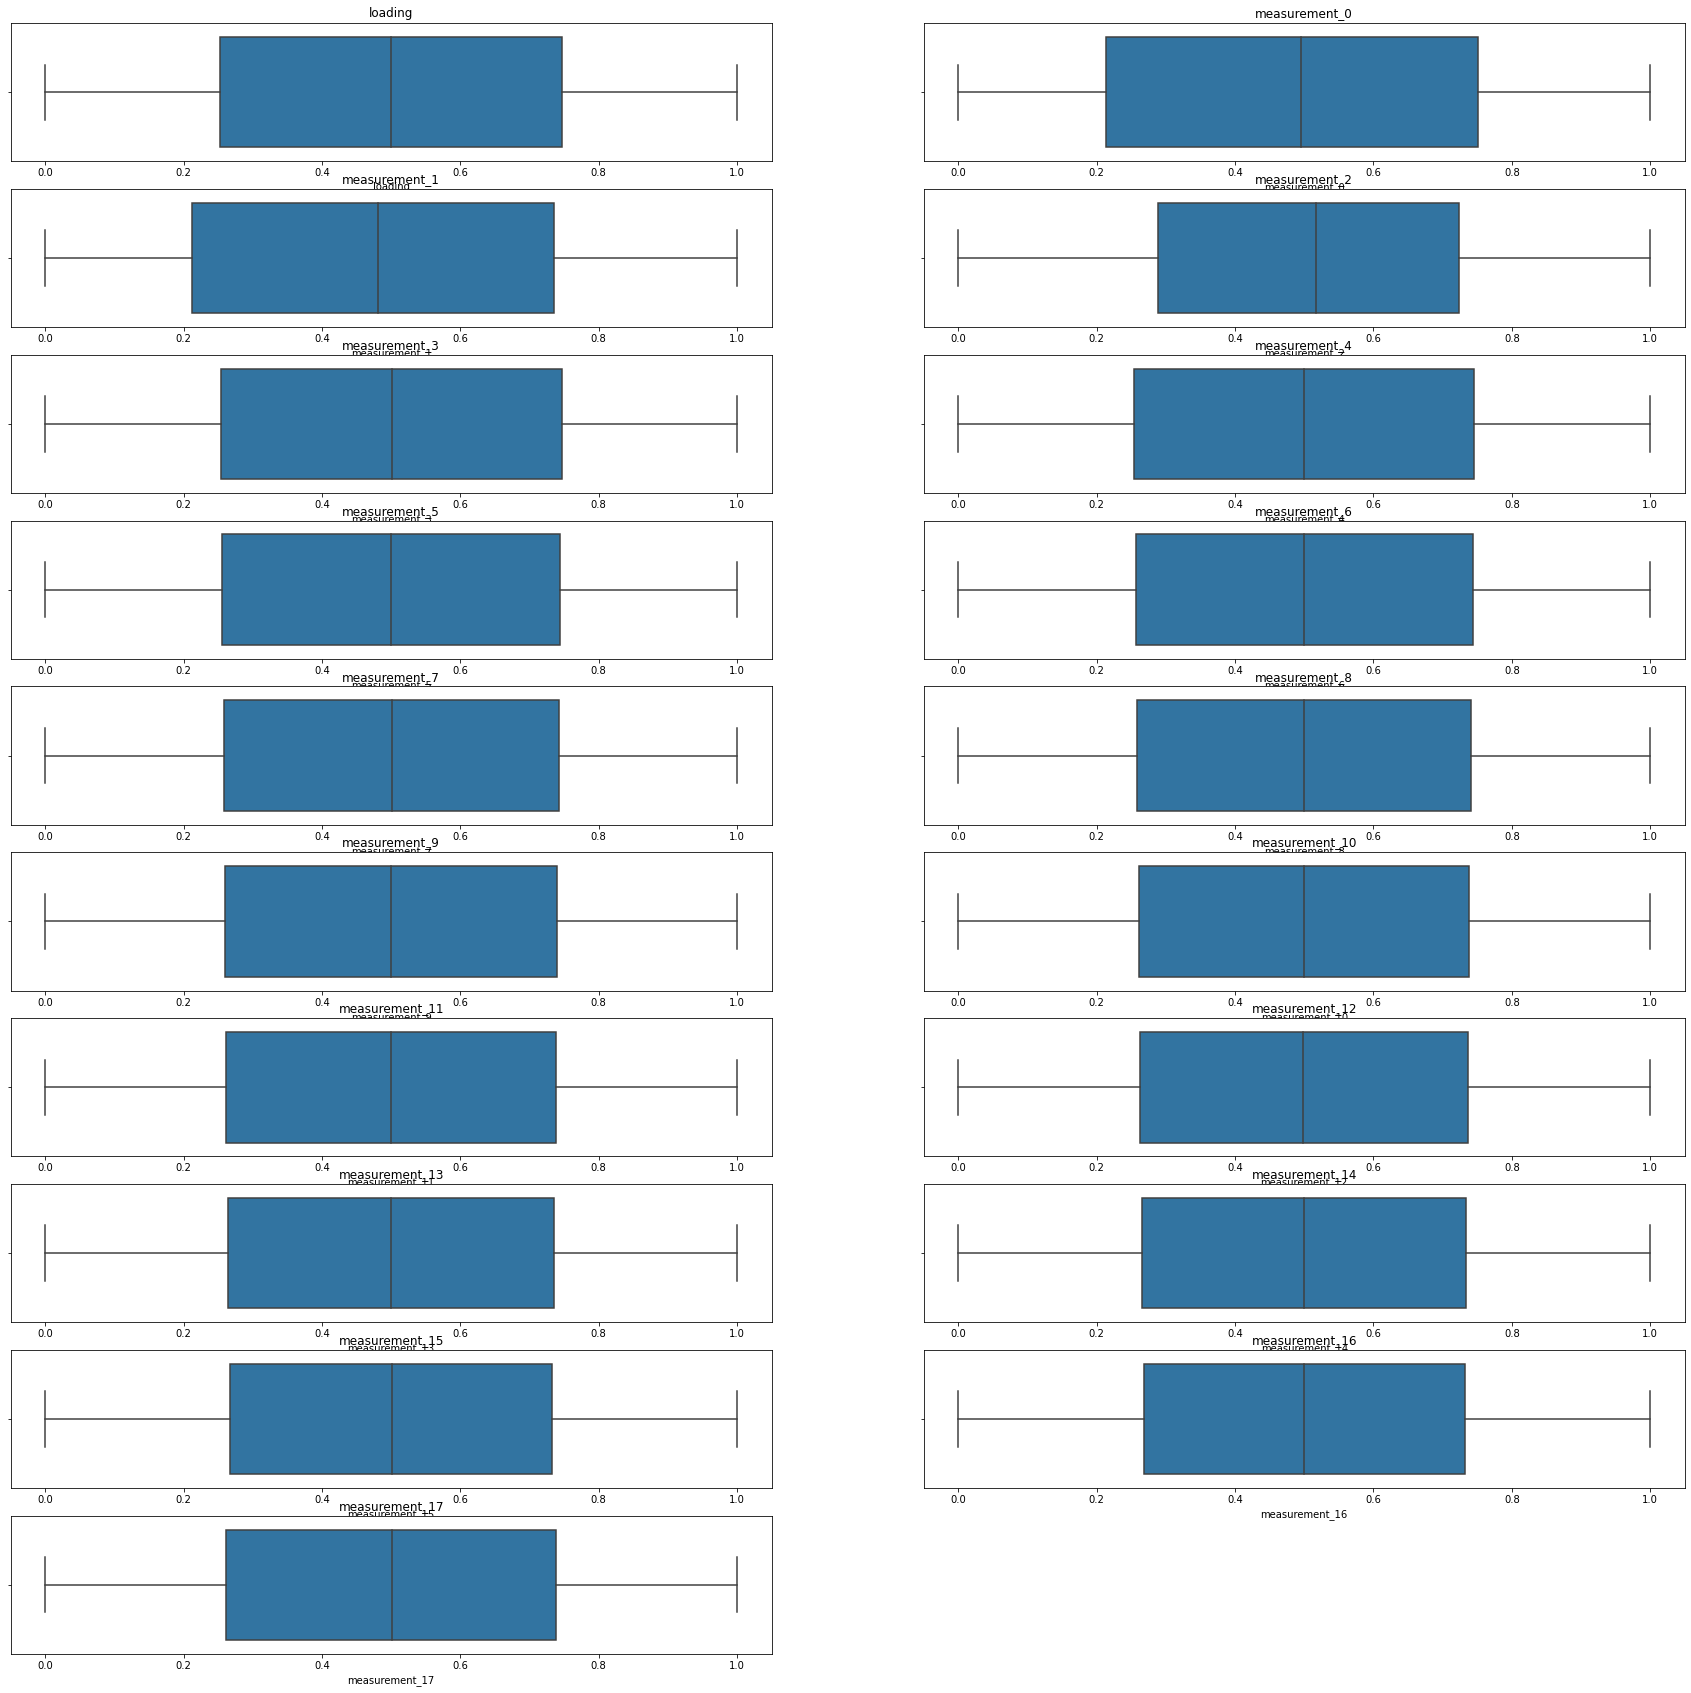

In [46]:
plt.figure(figsize= (30,30))
for i, col in enumerate(feature):
    plt.subplot(10,2,i+1)
    sns.boxplot(data=df_join1,
                x=df_join1[col])
    plt.title(col)

In [47]:
df_join1.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing
id,,,,,,,,,,,,,,,,,,,,,
0,0.077729,4,1,0.494995,0.481481,0.288288,0.598599,0.784117,0.083576,0.961962,...,0.137246,0.696380,0,1,0,0,0,1,0,0
1,0.111487,4,1,0.927928,0.086587,0.187688,0.662996,0.424758,0.718719,0.646146,...,0.301417,0.437050,0,1,0,0,0,1,0,0
2,0.094017,4,1,0.861862,0.020521,0.401902,0.604605,0.468125,0.348682,0.767434,...,0.797083,0.376298,0,1,0,0,0,1,0,0
3,0.264031,4,1,0.899399,0.047047,0.516517,0.309974,0.294294,0.925354,0.797464,...,0.637387,0.843211,0,1,0,0,0,1,0,0
4,0.924921,4,1,0.677177,0.047047,0.723223,0.939219,0.887888,0.445445,0.038789,...,0.469219,0.162469,0,1,0,0,0,1,0,0


In [48]:
df_train_clean = df_join1[:len(df_train)]
df_test_clean = df_join1[len(df_train):]
df_train_clean.shape, df_test_clean.shape

((26570, 29), (20775, 29))

In [49]:
df_train_clean = pd.concat([df_train_clean, df_train["failure"]], axis=1)
df_train_clean.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing,failure
0,0.077729,4,1,0.494995,0.481481,0.288288,0.598599,0.784117,0.083576,0.961962,...,0.696380,0,1,0,0,0,1,0,0,0
1,0.111487,4,1,0.927928,0.086587,0.187688,0.662996,0.424758,0.718719,0.646146,...,0.437050,0,1,0,0,0,1,0,0,0
2,0.094017,4,1,0.861862,0.020521,0.401902,0.604605,0.468125,0.348682,0.767434,...,0.376298,0,1,0,0,0,1,0,0,0
3,0.264031,4,1,0.899399,0.047047,0.516517,0.309974,0.294294,0.925354,0.797464,...,0.843211,0,1,0,0,0,1,0,0,0
4,0.924921,4,1,0.677177,0.047047,0.723223,0.939219,0.887888,0.445445,0.038789,...,0.162469,0,1,0,0,0,1,0,0,0


In [50]:
df_test_clean

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing
id,,,,,,,,,,,,,,,,,,,,,
26570,0.472472,1,0,0.394394,0.574575,0.516517,0.933640,0.060930,0.654154,0.743744,...,0.752553,0.291149,1,0,0,1,0,0,0,0
26571,0.404071,1,0,0.813313,0.481481,0.000000,0.538038,0.577077,0.538539,0.068735,...,0.074003,0.092980,1,0,0,1,0,0,0,0
26572,0.388277,1,0,0.591091,0.799800,0.288288,0.750417,0.107344,0.307307,0.751041,...,0.383884,0.362773,1,0,0,1,0,0,0,0
26573,0.394481,1,0,0.591091,0.734735,0.862362,0.101502,0.203203,0.033045,0.861662,...,0.404348,0.192924,1,0,0,1,0,0,0,0
26574,0.962945,1,0,0.927928,0.946446,0.723223,0.507841,0.832086,0.705706,0.044681,...,0.632633,0.790495,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,0.716696,4,1,0.000000,0.141141,0.802302,0.747247,0.798999,0.843243,0.335836,...,0.433108,0.484523,0,1,1,0,0,0,0,0
47341,0.047347,4,1,0.213213,0.481481,0.625626,0.863197,0.033339,0.875125,0.719874,...,0.488238,0.235641,0,1,1,0,0,0,0,0
47342,0.023391,4,1,0.751752,0.734735,0.108108,0.803303,0.422172,0.864665,0.652319,...,0.755756,0.747639,0,1,1,0,0,0,0,0


In [51]:
# df_train_clean.to_csv("clean_train.csv", index=False)
# df_test_clean.to_csv("clean_test.csv", index=False)

In [52]:
# import os
# os.remove("./clean_test.csv")
# os.remove("./clean_train.csv")

In [53]:
y = df_train_clean.failure

In [54]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26565    0
26566    0
26567    0
26568    0
26569    0
Name: failure, Length: 26570, dtype: int64

In [55]:
X = df_train_clean.drop("failure", axis=1)

In [56]:
X

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing
0,0.077729,4,1,0.494995,0.481481,0.288288,0.598599,0.784117,0.083576,0.961962,...,0.137246,0.696380,0,1,0,0,0,1,0,0
1,0.111487,4,1,0.927928,0.086587,0.187688,0.662996,0.424758,0.718719,0.646146,...,0.301417,0.437050,0,1,0,0,0,1,0,0
2,0.094017,4,1,0.861862,0.020521,0.401902,0.604605,0.468125,0.348682,0.767434,...,0.797083,0.376298,0,1,0,0,0,1,0,0
3,0.264031,4,1,0.899399,0.047047,0.516517,0.309974,0.294294,0.925354,0.797464,...,0.637387,0.843211,0,1,0,0,0,1,0,0
4,0.924921,4,1,0.677177,0.047047,0.723223,0.939219,0.887888,0.445445,0.038789,...,0.469219,0.162469,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.811120,1,5,0.394394,0.946446,0.288288,0.068235,0.936391,0.823824,0.021797,...,0.633642,0.590617,0,1,0,1,0,0,0,0
26566,0.727330,1,5,0.751752,0.799800,0.723223,0.402736,0.291608,0.800467,0.941090,...,0.481732,0.889520,0,1,0,1,0,0,0,0
26567,0.427761,1,5,0.048048,0.659159,0.050050,0.017268,0.422923,0.363030,0.809810,...,0.071225,0.656023,0,1,0,1,0,0,0,0
26568,0.323101,1,5,0.088088,0.574575,0.288288,0.605606,0.666804,0.416750,0.721445,...,0.014071,0.593869,0,1,0,1,0,0,0,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)

In [58]:
# 20%
X_train80, X_test20, y_train80, y_test80 = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

### Find optimal wieght class

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.3s
[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.3s
[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.2s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.3s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.3s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.3s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.3s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.2s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.980

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

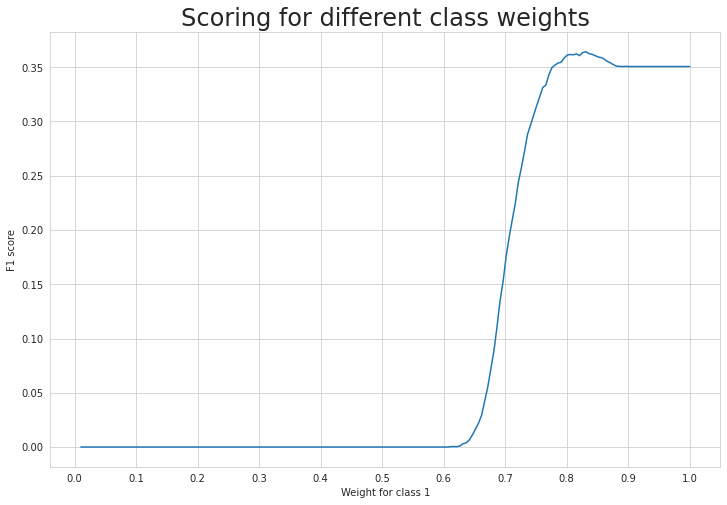

In [59]:
lr1 = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr1, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [60]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

The f1 score for the testing data: 0.36146435452793835


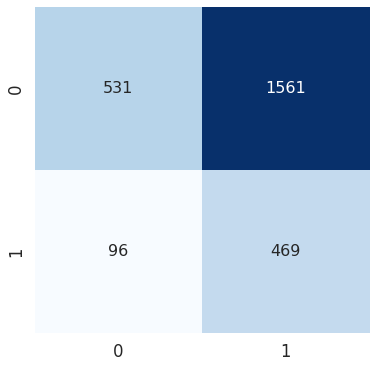

In [61]:
class_weight={0: 0.16417085427135678, 1: 0.8358291457286432}

lr1 = LogisticRegression(solver='newton-cg', class_weight=class_weight)
lr1.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr1.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits

[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.3s
[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.3s
[CV] END class_weight={0: 0.9104020100502512, 1: 0.08959798994974877}; total time=   0.4s
[CV] END class_weight={0: 0.9153768844221106, 1: 0.08462311557788937}; total time=   0.3s
[CV] END class_weight={0: 0.9153768844221106, 1: 0.08462311557788937}; total time=   0.3s
[CV] END class_weight={0: 0.9203517587939699, 1: 0.07964824120603009}; total time=   0.3s
[CV] END class_weight={0: 0.9203517587939699, 1: 0.07964824120603009}; total time=   0.3s
[CV] END class_weight={0: 0.9203517587939699, 1: 0.07964824120603009}; total time=   0.3s
[CV] END class_weight={0: 0.9253266331658292, 1: 0.0746733668341708}; total time=   0.3s
[CV] END class_weight={0: 0.9253266331658292, 1: 0.0746733668341708}; total time=   0.3s
[CV] END class_weight={0: 0.930301507

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

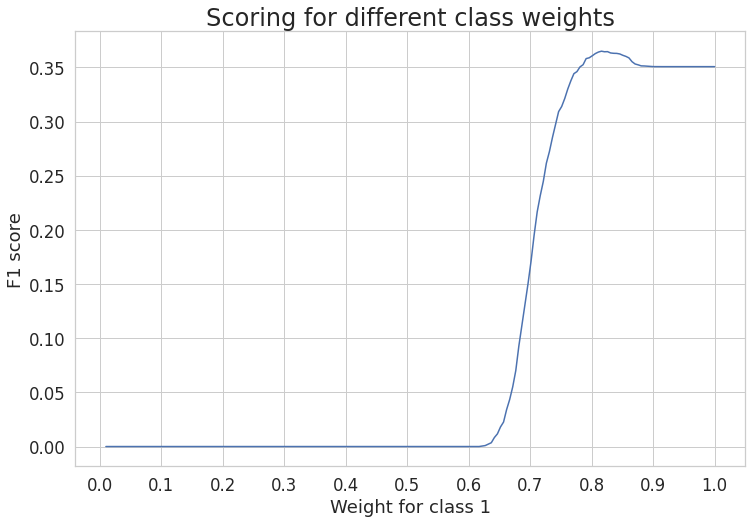

In [62]:
# train on 80% train set
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train80, y_train80)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the testing data: 0.3645093143844824


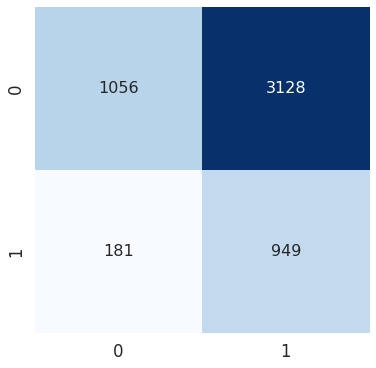

In [63]:
class_weight={0: 0.16417085427135678, 1: 0.8358291457286432}

lr = LogisticRegression(solver='newton-cg', class_weight=class_weight)
lr.fit(X_train80, y_train80)

# Predicting on the test data
pred_test = lr.predict(X_test20)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test80, pred_test)
print('The f1 score for the testing data:', f1_test)


#Ploting the confusion matrix
conf_matrix(y_test80, pred_test)

#### Save the results

In [64]:
df_test_clean

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8,m_3_missing,m_5_missing
id,,,,,,,,,,,,,,,,,,,,,
26570,0.472472,1,0,0.394394,0.574575,0.516517,0.933640,0.060930,0.654154,0.743744,...,0.752553,0.291149,1,0,0,1,0,0,0,0
26571,0.404071,1,0,0.813313,0.481481,0.000000,0.538038,0.577077,0.538539,0.068735,...,0.074003,0.092980,1,0,0,1,0,0,0,0
26572,0.388277,1,0,0.591091,0.799800,0.288288,0.750417,0.107344,0.307307,0.751041,...,0.383884,0.362773,1,0,0,1,0,0,0,0
26573,0.394481,1,0,0.591091,0.734735,0.862362,0.101502,0.203203,0.033045,0.861662,...,0.404348,0.192924,1,0,0,1,0,0,0,0
26574,0.962945,1,0,0.927928,0.946446,0.723223,0.507841,0.832086,0.705706,0.044681,...,0.632633,0.790495,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,0.716696,4,1,0.000000,0.141141,0.802302,0.747247,0.798999,0.843243,0.335836,...,0.433108,0.484523,0,1,1,0,0,0,0,0
47341,0.047347,4,1,0.213213,0.481481,0.625626,0.863197,0.033339,0.875125,0.719874,...,0.488238,0.235641,0,1,1,0,0,0,0,0
47342,0.023391,4,1,0.751752,0.734735,0.108108,0.803303,0.422172,0.864665,0.652319,...,0.755756,0.747639,0,1,1,0,0,0,0,0


In [65]:
preds = lr.predict(df_test_clean)
preds

array([1, 1, 1, ..., 0, 1, 0])

In [66]:
df_test.id

0        26570
1        26571
2        26572
3        26573
4        26574
         ...  
20770    47340
20771    47341
20772    47342
20773    47343
20774    47344
Name: id, Length: 20775, dtype: int64

In [67]:
submission = pd.DataFrame({'id': df_test.id,'failure': preds})
submission.to_csv('submission.csv', index=False)
submission.failure.value_counts()

1    16195
0     4580
Name: failure, dtype: int64

### Deep Learning Model

In [68]:
# # Create the model
# model = Sequential([
#   Dense(10),
#   Activation("relu"),
#   Dense(10),
#   Activation("relu"),
#   Dense(10),
#   Activation("relu"),
#   Dense(1),
#   Activation("sigmoid")
# ])

# es = EarlyStopping(monitor="val_loss",patience=15)

# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                  optimizer=tf.keras.optimizers.Adam(),
#                  metrics=["accuracy"])

# history = model.fit(X_train,
#                     y_train,
#                     epochs=100,
#                     class_weight=class_weight,
#                     validation_data=(X_test, y_test))

In [69]:
# y_probs = model.predict(X_test)
# y_preds = y_probs.argmax(axis=-1)

# #Calculating and printing the f1 score 
# f1_test = f1_score(y_test, y_preds)
# print('The f1 score for the testing data:', f1_test)

# #Ploting the confusion matrix
# conf_matrix(y_test, y_preds)

In [70]:
class_weight={0: 0.16417085427135678, 1: 0.8358291457286432}

# Create the model
model2 = Sequential([
  Dense(512, activation="relu"),
  Dropout(0.5),
  Dense(256, activation="relu"),
  Dropout(0.4),
  Dense(128, activation="relu"),
  Dropout(0.3),
  Dense(64, activation="relu"),
  Dropout(0.1),
  Dense(32, activation="relu"),
  Dense(1, activation="sigmoid")
])

es = EarlyStopping(monitor="val_loss",patience=15)

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=[tf.keras.metrics.AUC()])

history2 = model2.fit(X_train,
                    y_train,
                    epochs=50,
                    class_weight=class_weight,
                    validation_data=(X_test, y_test))


2022-12-05 08:01:57.526953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 08:01:57.638017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 08:01:57.638905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 08:01:57.640759: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50
748/748 [==============================] - 6s 5ms/step - loss: 0.2100 - auc: 0.5052 - val_loss: 0.8113 - val_auc: 0.5503
Epoch 2/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2084 - auc: 0.5389 - val_loss: 0.7575 - val_auc: 0.5738
Epoch 3/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2074 - auc: 0.5613 - val_loss: 0.8086 - val_auc: 0.5797
Epoch 4/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2070 - auc: 0.5696 - val_loss: 0.7389 - val_auc: 0.5751
Epoch 5/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2071 - auc: 0.5682 - val_loss: 0.8000 - val_auc: 0.5762
Epoch 6/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2067 - auc: 0.5727 - val_loss: 0.7716 - val_auc: 0.5776
Epoch 7/50
748/748 [==============================] - 3s 4ms/step - loss: 0.2064 - auc: 0.5779 - val_loss: 0.7862 - val_auc: 0.5791
Epoch 8/50
748/748 [==============================] - 3s 4ms/step - loss: 0.

In [71]:
class_weight={0: 0.10, 1: 0.90}

# Create the model
model3 = tf.keras.models.clone_model(model2)

es = EarlyStopping(monitor="val_loss",patience=15)

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=[tf.keras.metrics.AUC()])

history2 = model3.fit(X_train,
                    y_train,
                    epochs=50,
                    class_weight=class_weight,
                    validation_data=(X_test, y_test))

Epoch 1/50
748/748 [==============================] - 4s 4ms/step - loss: 0.1648 - auc_1: 0.5162 - val_loss: 0.9940 - val_auc_1: 0.5701
Epoch 2/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1628 - auc_1: 0.5422 - val_loss: 0.9833 - val_auc_1: 0.5763
Epoch 3/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1623 - auc_1: 0.5506 - val_loss: 0.9688 - val_auc_1: 0.5725
Epoch 4/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1616 - auc_1: 0.5697 - val_loss: 1.0967 - val_auc_1: 0.5773
Epoch 5/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1620 - auc_1: 0.5610 - val_loss: 0.9914 - val_auc_1: 0.5765
Epoch 6/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1615 - auc_1: 0.5709 - val_loss: 1.0044 - val_auc_1: 0.5728
Epoch 7/50
748/748 [==============================] - 3s 4ms/step - loss: 0.1612 - auc_1: 0.5752 - val_loss: 0.9259 - val_auc_1: 0.5791
Epoch 8/50
748/748 [============================